In [3]:
import numpy as np 
import pandas as pd 
import warnings
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [4]:
train_data = pd.read_excel("train.xlsx")

In [6]:
train_data.head(5)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [7]:
test_data = pd.read_excel("test.xlsx")

In [9]:
test_data.head(5)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57


In [10]:
train_data.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000
mean,-65.865449,-64.521931,-64.574472,-65.296474,-64.462152,-63.318731,-67.030202,-66.591260,-65.692479,-65.555181,-65.681922,-66.244204,-63.962614,-64.399080,-64.550011,-64.136782,-65.910726,-66.590417
std,8.737286,8.914559,8.154517,8.142803,8.068375,8.651501,9.257529,10.160193,10.598247,10.408147,9.453958,8.866239,8.254217,9.562839,9.207343,10.540542,10.071973,10.600992
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-75.000000,-73.000000,-73.000000,-71.000000,-72.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-74.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.000000,-66.000000,-63.000000,-64.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-59.000000,-59.000000,-61.000000,-59.000000,-57.000000,-60.000000,-59.000000,-58.000000,-58.000000,-59.000000,-61.000000,-58.000000,-58.000000,-58.000000,-57.000000,-59.000000,-59.000000
max,-41.000000,-37.000000,-41.000000,-39.000000,-36.000000,-39.000000,-45.000000,-39.000000,-39.000000,-37.000000,-40.000000,-43.000000,-43.000000,-39.000000,-38.000000,-40.000000,-43.000000,-39.000000


In [12]:
# function to check null values
def check_null_values(df, df_name):
    null_counts = df.isnull().sum()
    total_nulls = null_counts[null_counts > 0]
    if total_nulls.empty:
        print(f"No null values found in {df_name}")
    else:
        print(f"Null values in {df_name}:")
        print(total_nulls)

# Check null values in train and test datasets
check_null_values(train_data, 'Train Dataset')
check_null_values(test_data, 'Test Dataset')

No null values found in Train Dataset
No null values found in Test Dataset


In [27]:
train_data.shape[0]

36752

In [15]:
print("Shape of train data is: ",train_data.shape)
print("Shape of test data is: ",test_data.shape)

Shape of train data is:  (36752, 19)
Shape of test data is:  (15752, 18)


In [28]:
def check_duplicate_data(df, df_name):
    duplicate_rows = df[df.duplicated()]
    if duplicate_rows.empty:
        print(f"No duplicate rows found in {df_name}")
    else:
        print(f"Duplicate rows in {df_name}:")
        print("Total Duplicate rows are: ", duplicate_rows.shape[0])
        print(duplicate_rows)

# Check duplicate data in train dataset
check_duplicate_data(train_data, 'Train Dataset')

Duplicate rows in Train Dataset:
Total Duplicate rows are:  1267
       T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  \
870   -61 -60 -56 -55 -49 -62 -72 -63 -66  -68  -64  -61  -57  -59  -64  -65   
889   -64 -70 -63 -68 -61 -57 -61 -56 -66  -70  -68  -65  -73  -65  -49  -45   
995   -67 -66 -63 -59 -61 -43 -64 -65 -82  -61  -59  -75  -57  -52  -53  -55   
1084  -67 -65 -63 -60 -62 -48 -64 -65 -80  -61  -58  -75  -57  -52  -53  -55   
1887  -65 -67 -65 -65 -60 -56 -78 -76 -78  -64  -62  -70  -57  -70  -59  -64   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
36673 -64 -57 -70 -64 -77 -69 -79 -80 -78  -55  -47  -62  -62  -80  -69  -67   
36704 -63 -71 -65 -71 -77 -68 -95 -80 -75  -63  -68  -70  -81  -95  -75  -95   
36707 -64 -72 -63 -68 -61 -57 -62 -54 -65  -70  -67  -65  -72  -65  -49  -44   
36714 -64 -67 -63 -68 -69 -64 -60 -79 -67  -75  -71  -63  -58  -51  -50  -55   
36746 -60 -61 -53 -54 -68 -60 -78 -69 -73  -69  -66  -5

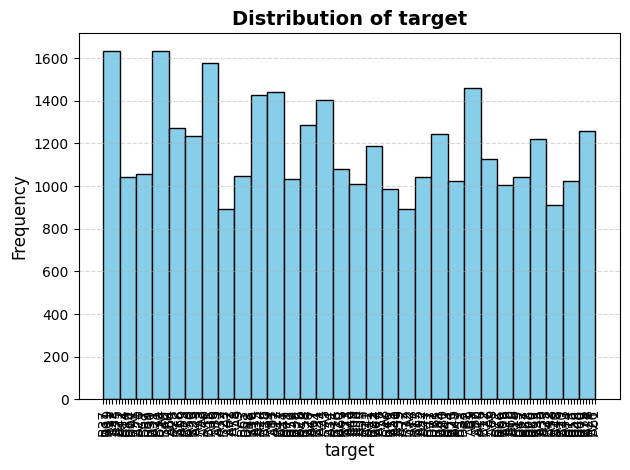

In [33]:
plt.hist(train_data['target'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of target', fontsize=14, fontweight='bold')
plt.xlabel('target', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

In [34]:
continuous_vars = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [35]:
print("Continuous_vars are: ",continuous_vars)

Continuous_vars are:  ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18']


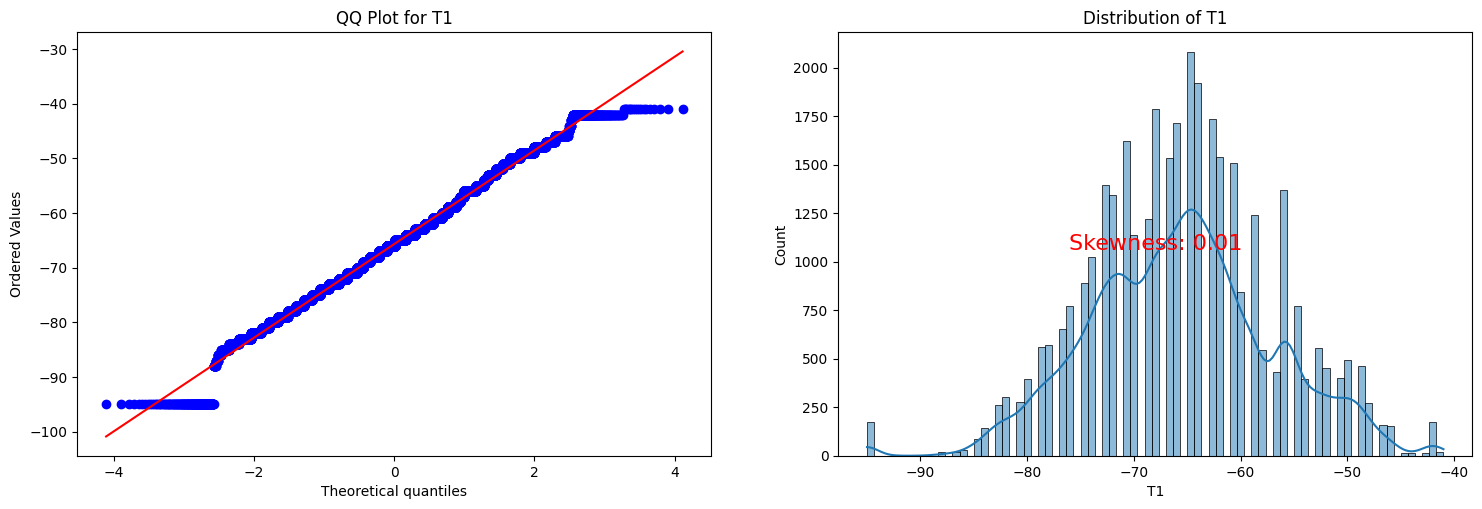

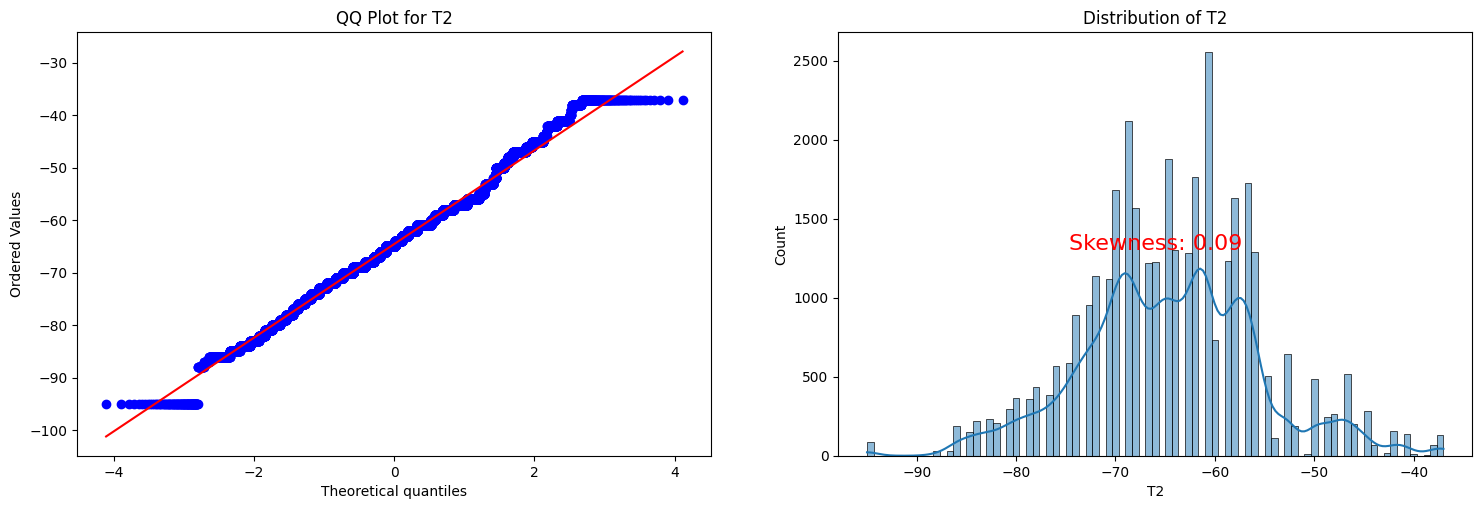

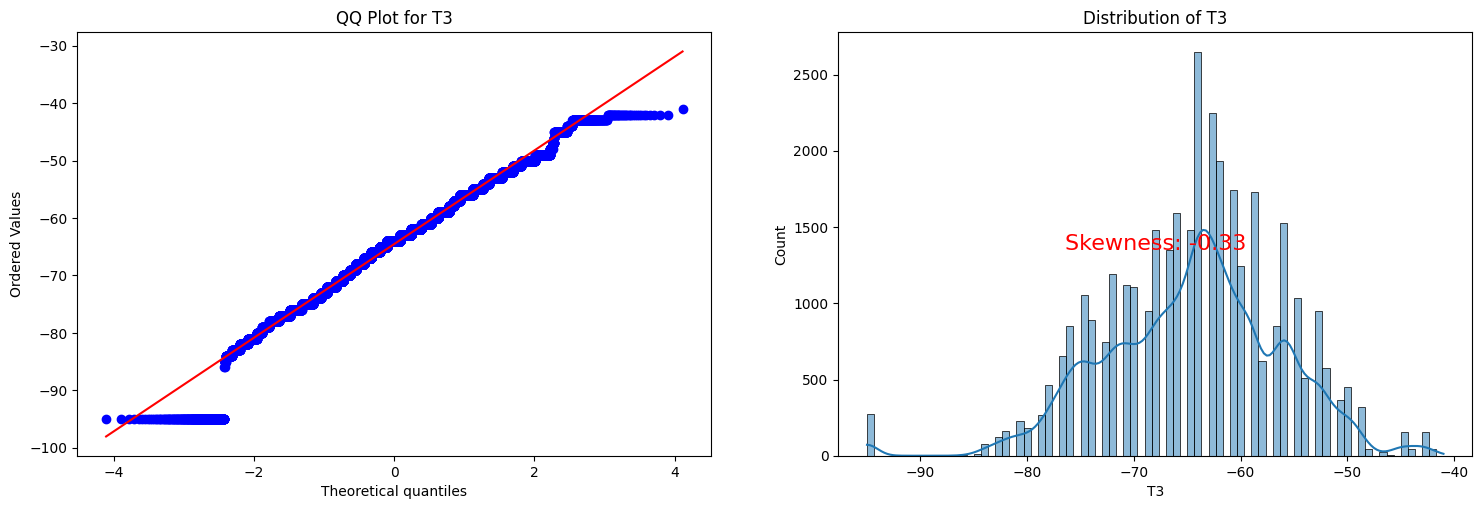

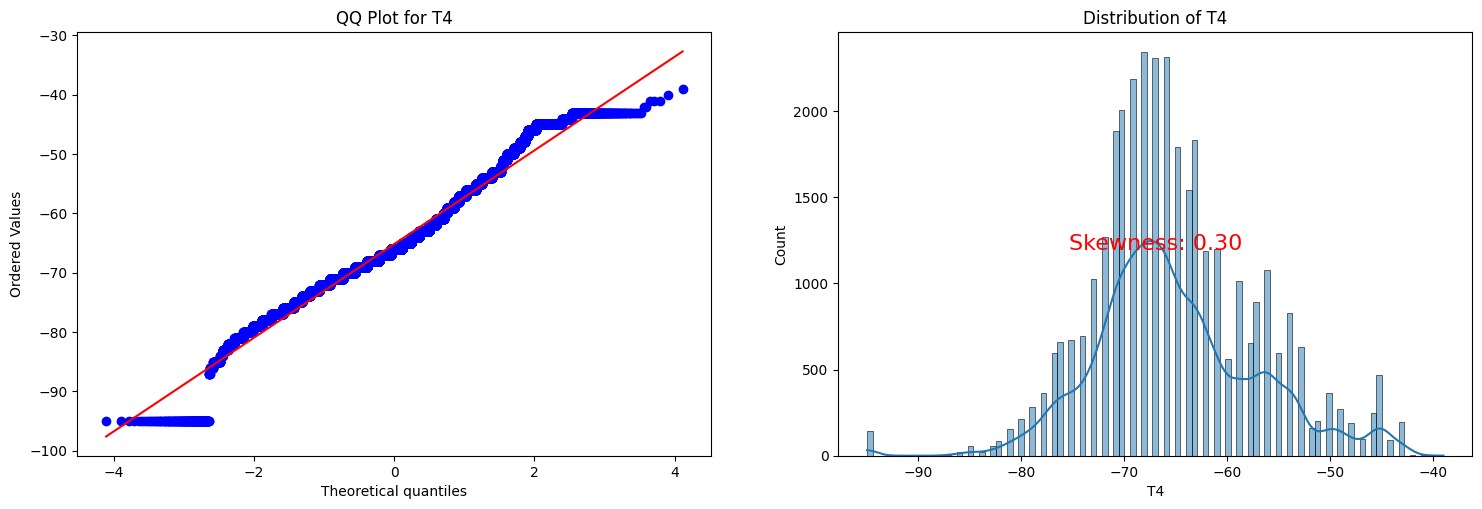

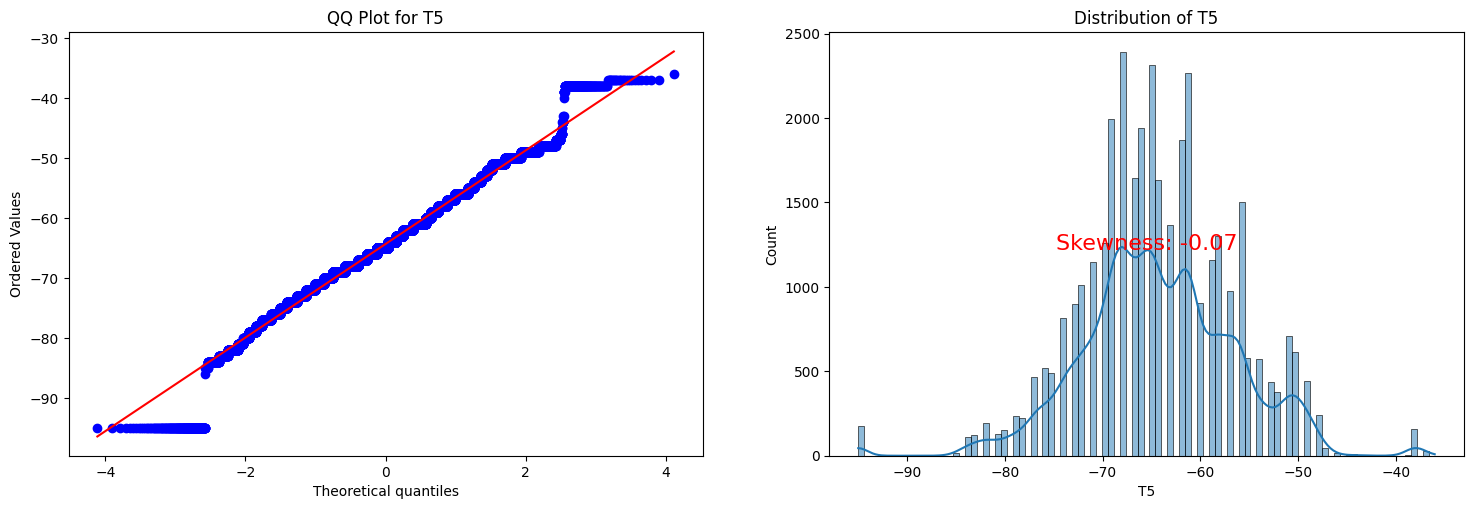

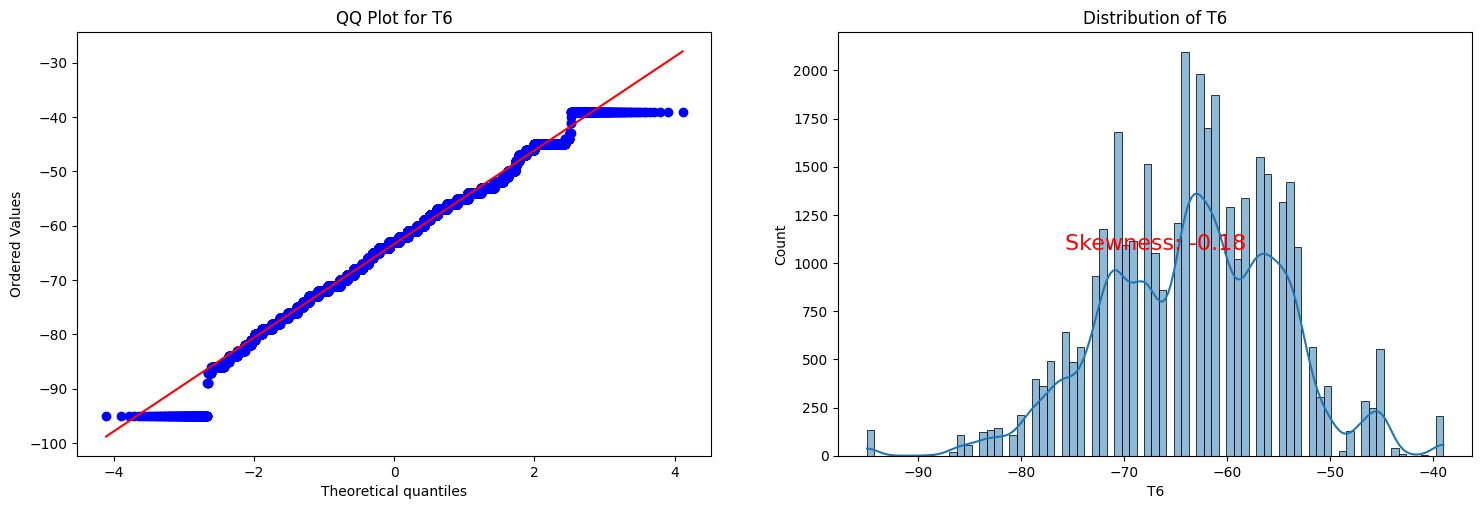

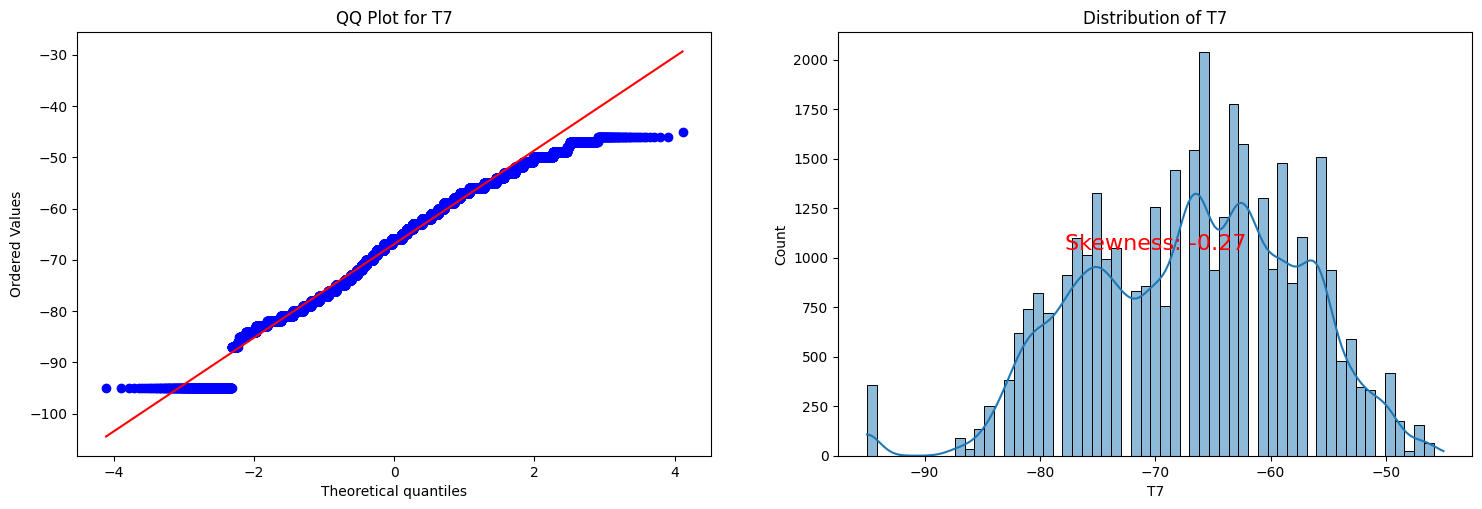

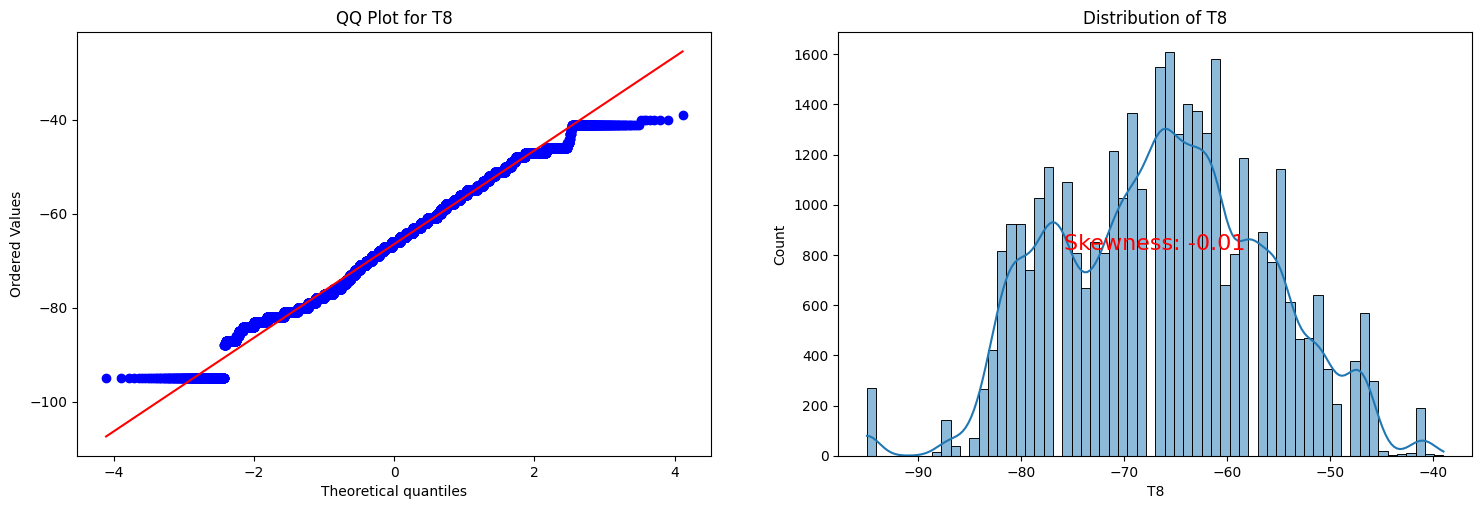

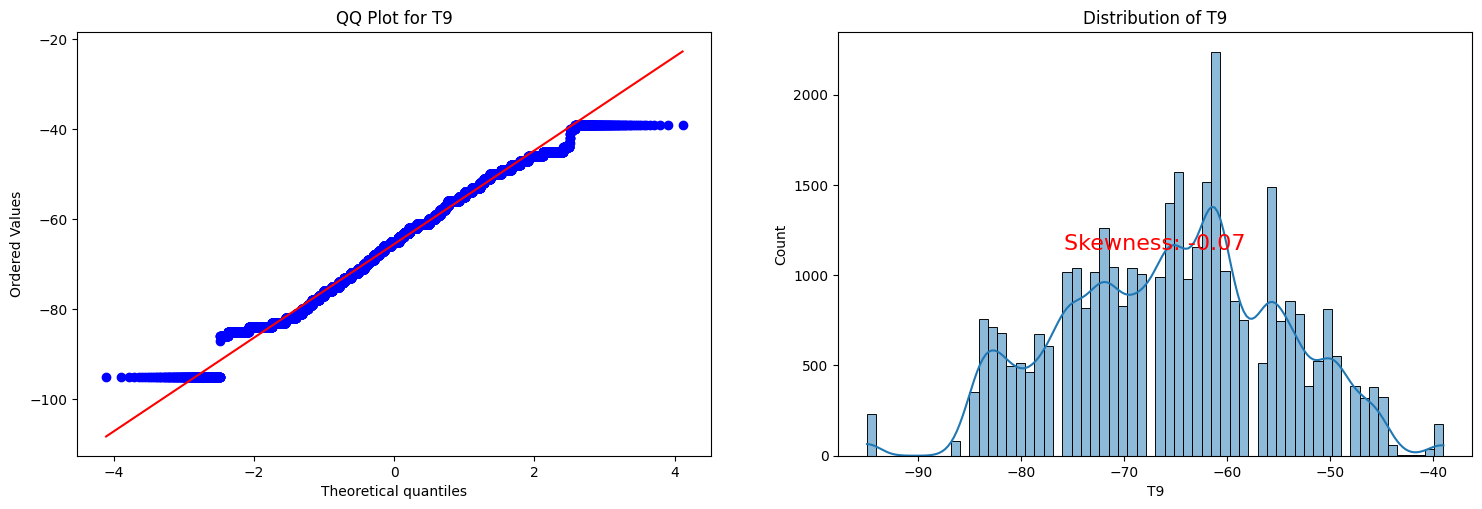

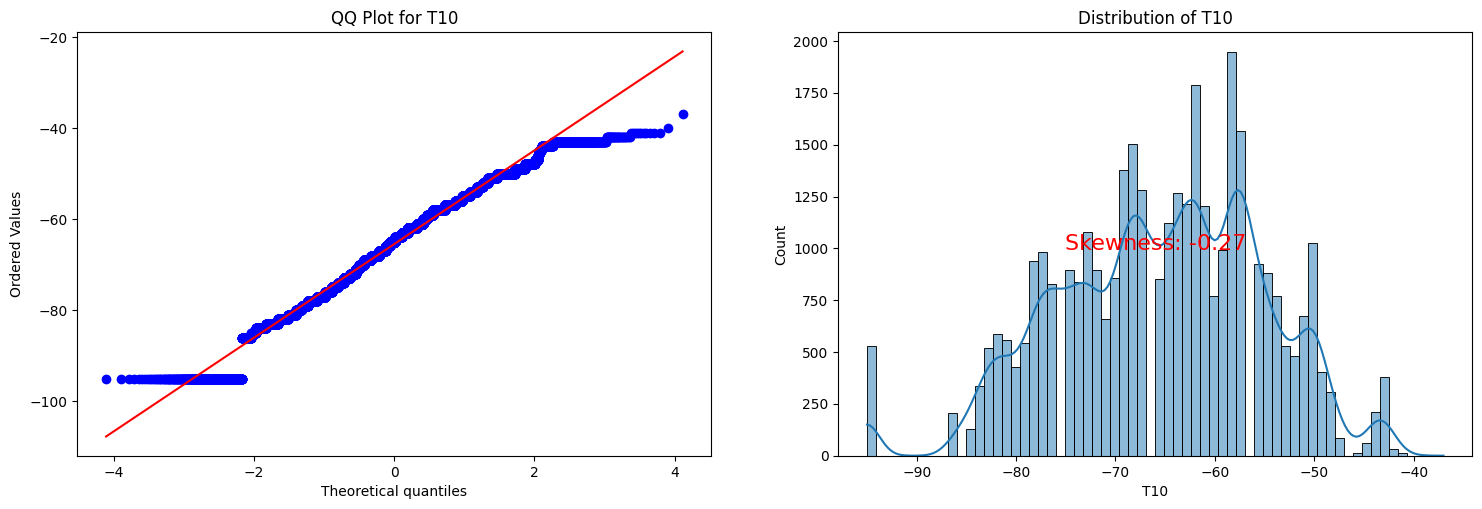

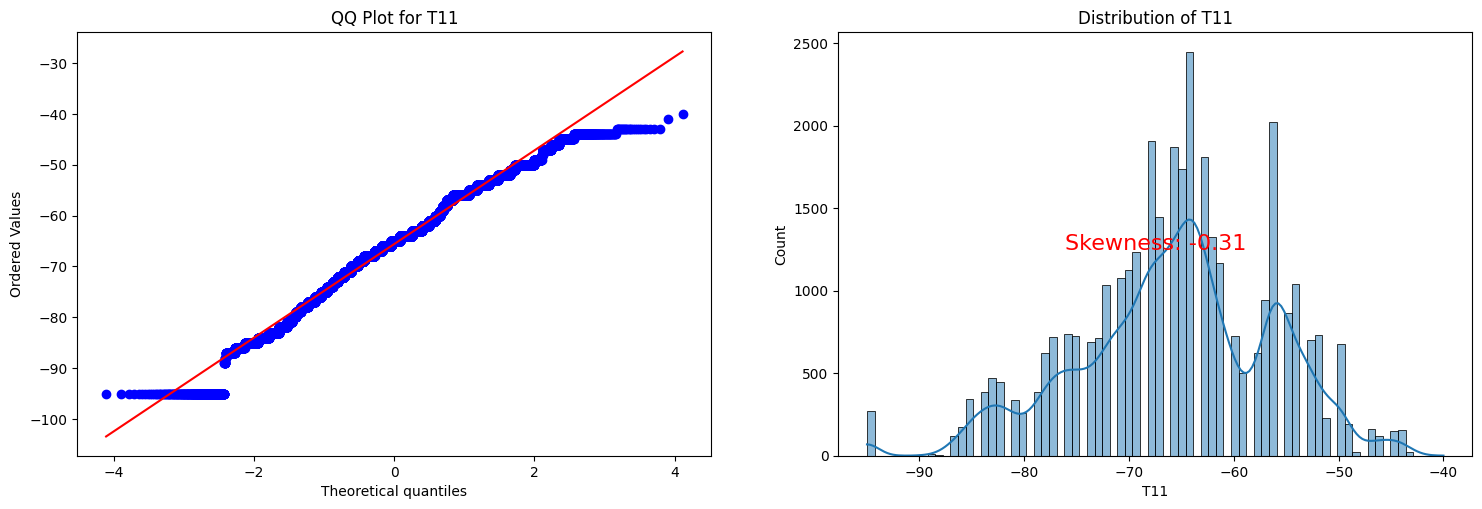

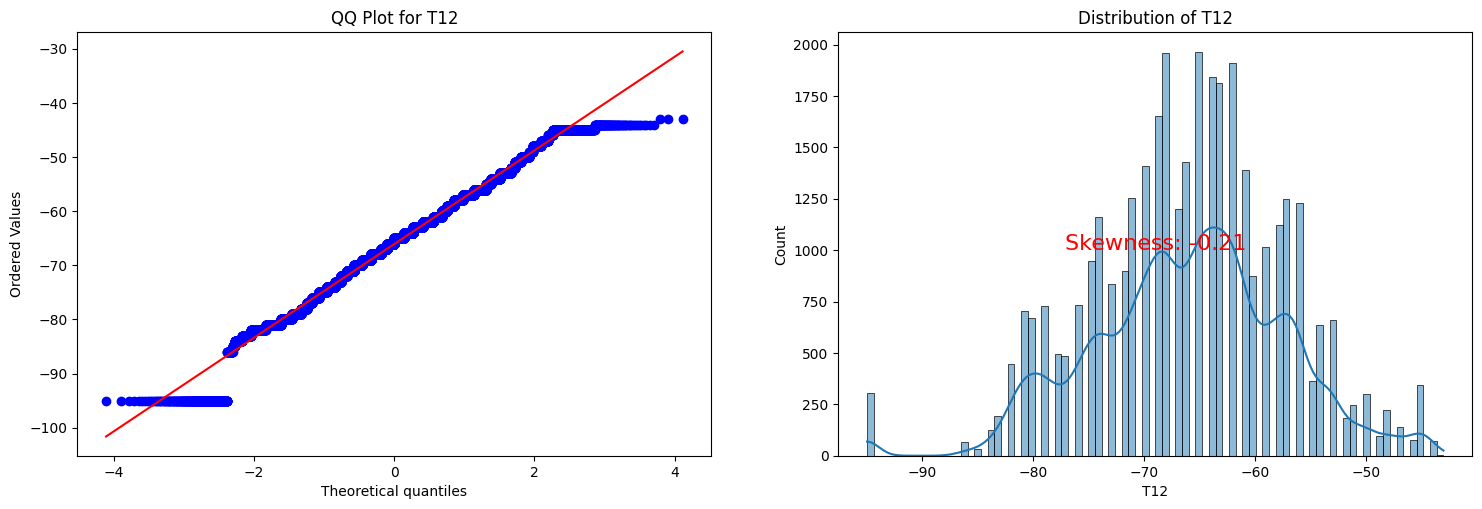

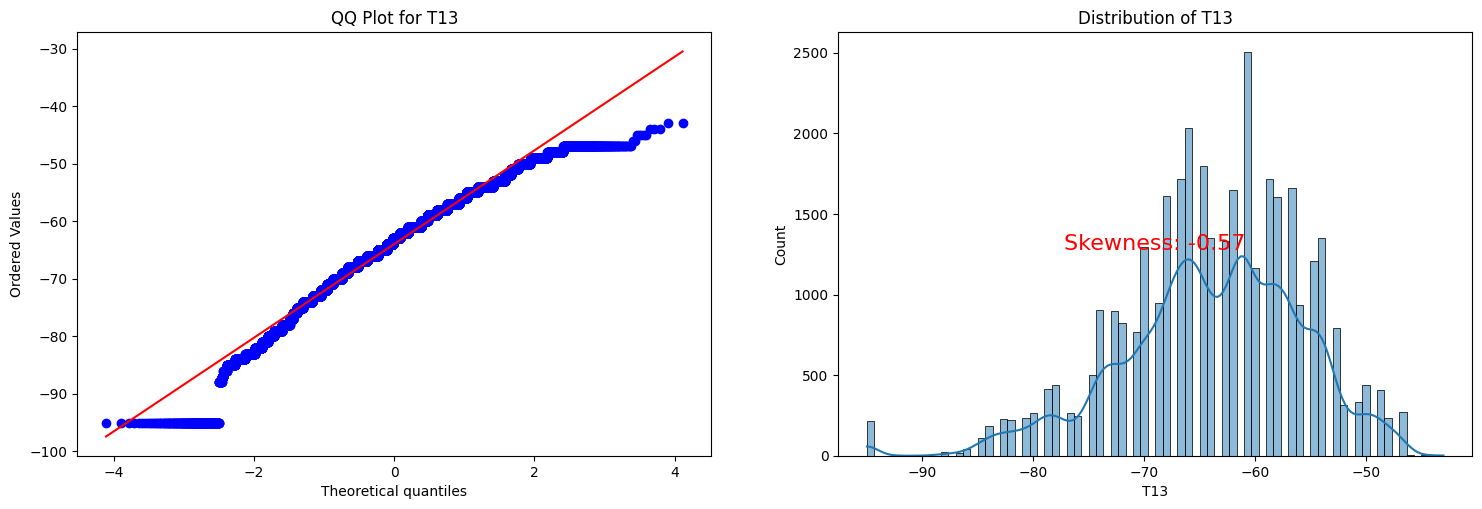

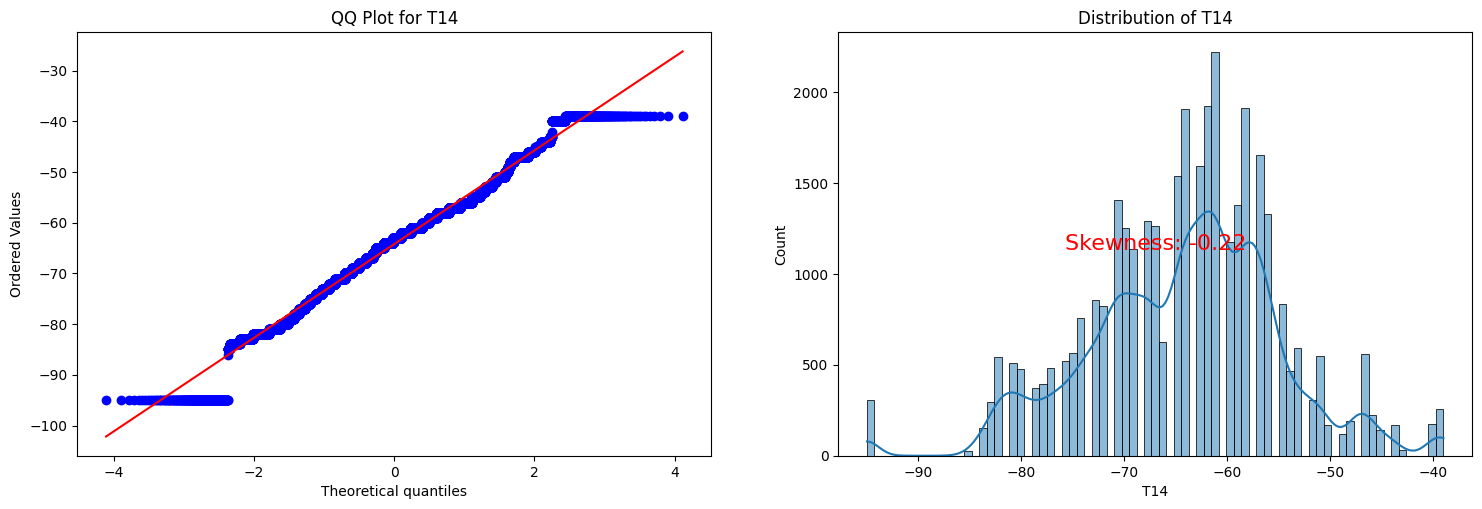

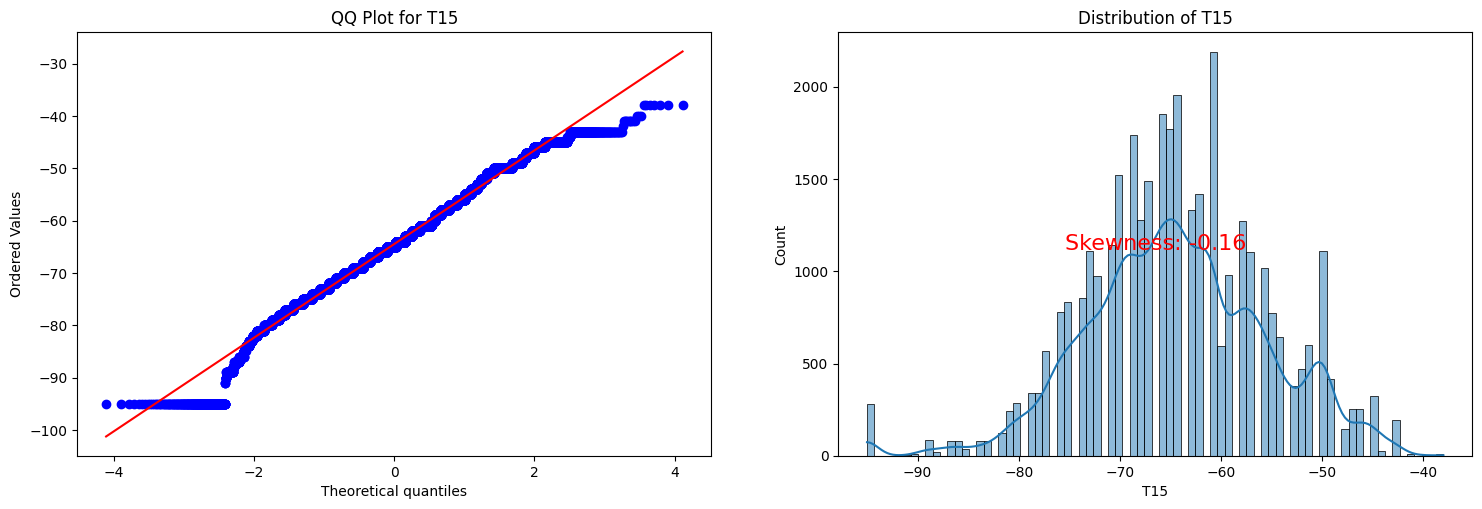

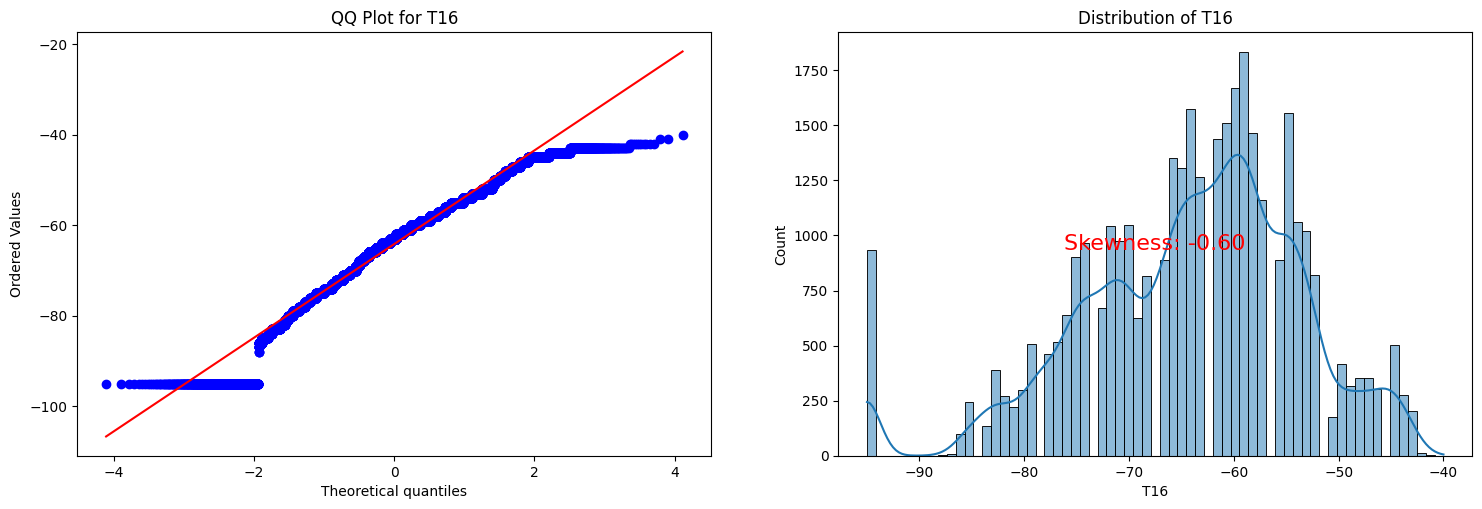

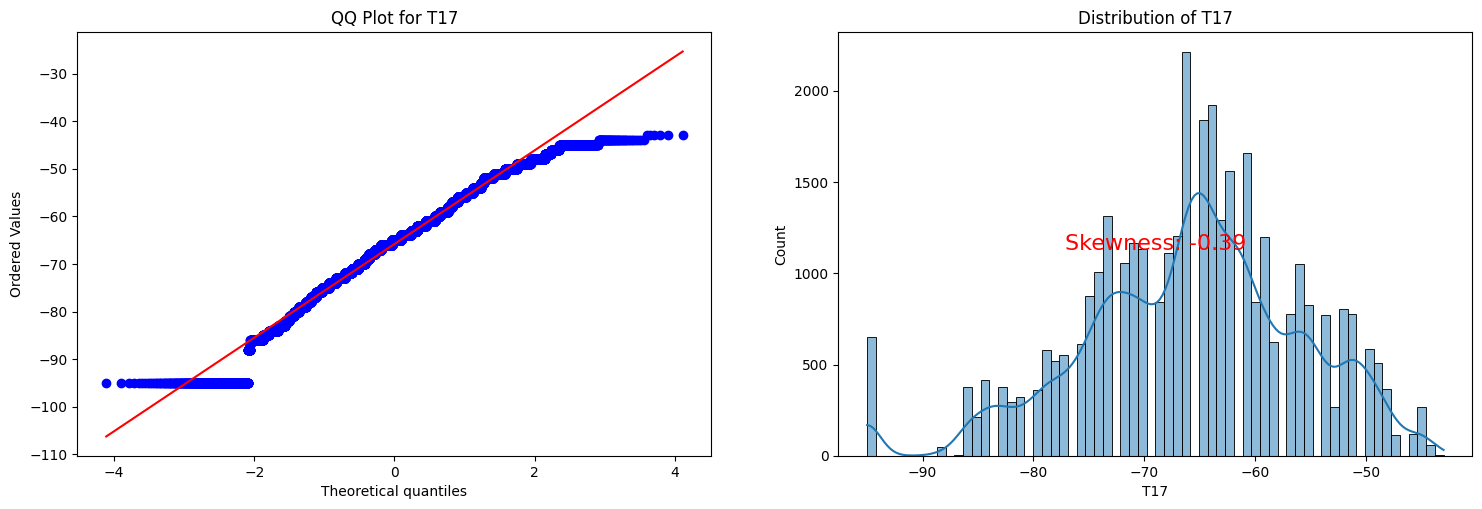

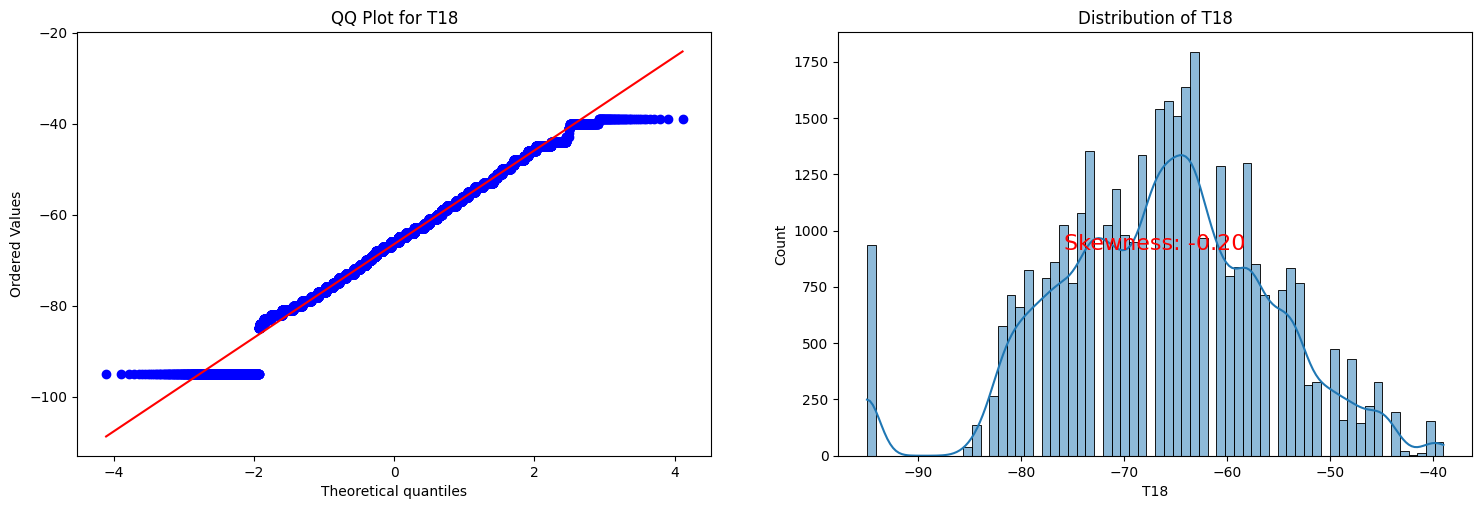

In [37]:
import scipy.stats as stats  
def qq_plot_with_skewness(data, quantitative_var):
    # Check if the variable is present in the DataFrame
    if quantitative_var not in data.columns:
        print(f"Error: '{quantitative_var}' not found in the DataFrame.")
        return
    
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))

    # Check for missing values
    if data[quantitative_var].isnull().any():
        print(f"Warning: '{quantitative_var}' contains missing values. Results may be affected.")

    # QQ plot
    stats.probplot(data[quantitative_var], plot=ax[0], fit=True)
    ax[0].set_title(f'QQ Plot for {quantitative_var}')

    # Skewness plot
    sns.histplot(data[quantitative_var], kde=True, ax=ax[1])
    ax[1].set_title(f'Distribution of {quantitative_var}')

    # Calculate skewness value
    skewness_value = stats.skew(data[quantitative_var])

    # Display skewness value on the plot
    ax[1].text(0.5, 0.5, f'Skewness: {skewness_value:.2f}', transform=ax[1].transAxes, 
               horizontalalignment='center', verticalalignment='center', fontsize=16, color='red')

    plt.show()
# Example usage for each continuous variable
for var in continuous_vars:
    qq_plot_with_skewness(train_data, var)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔍OUTLIERS CHECK BY BOX PLOT🔍</div>

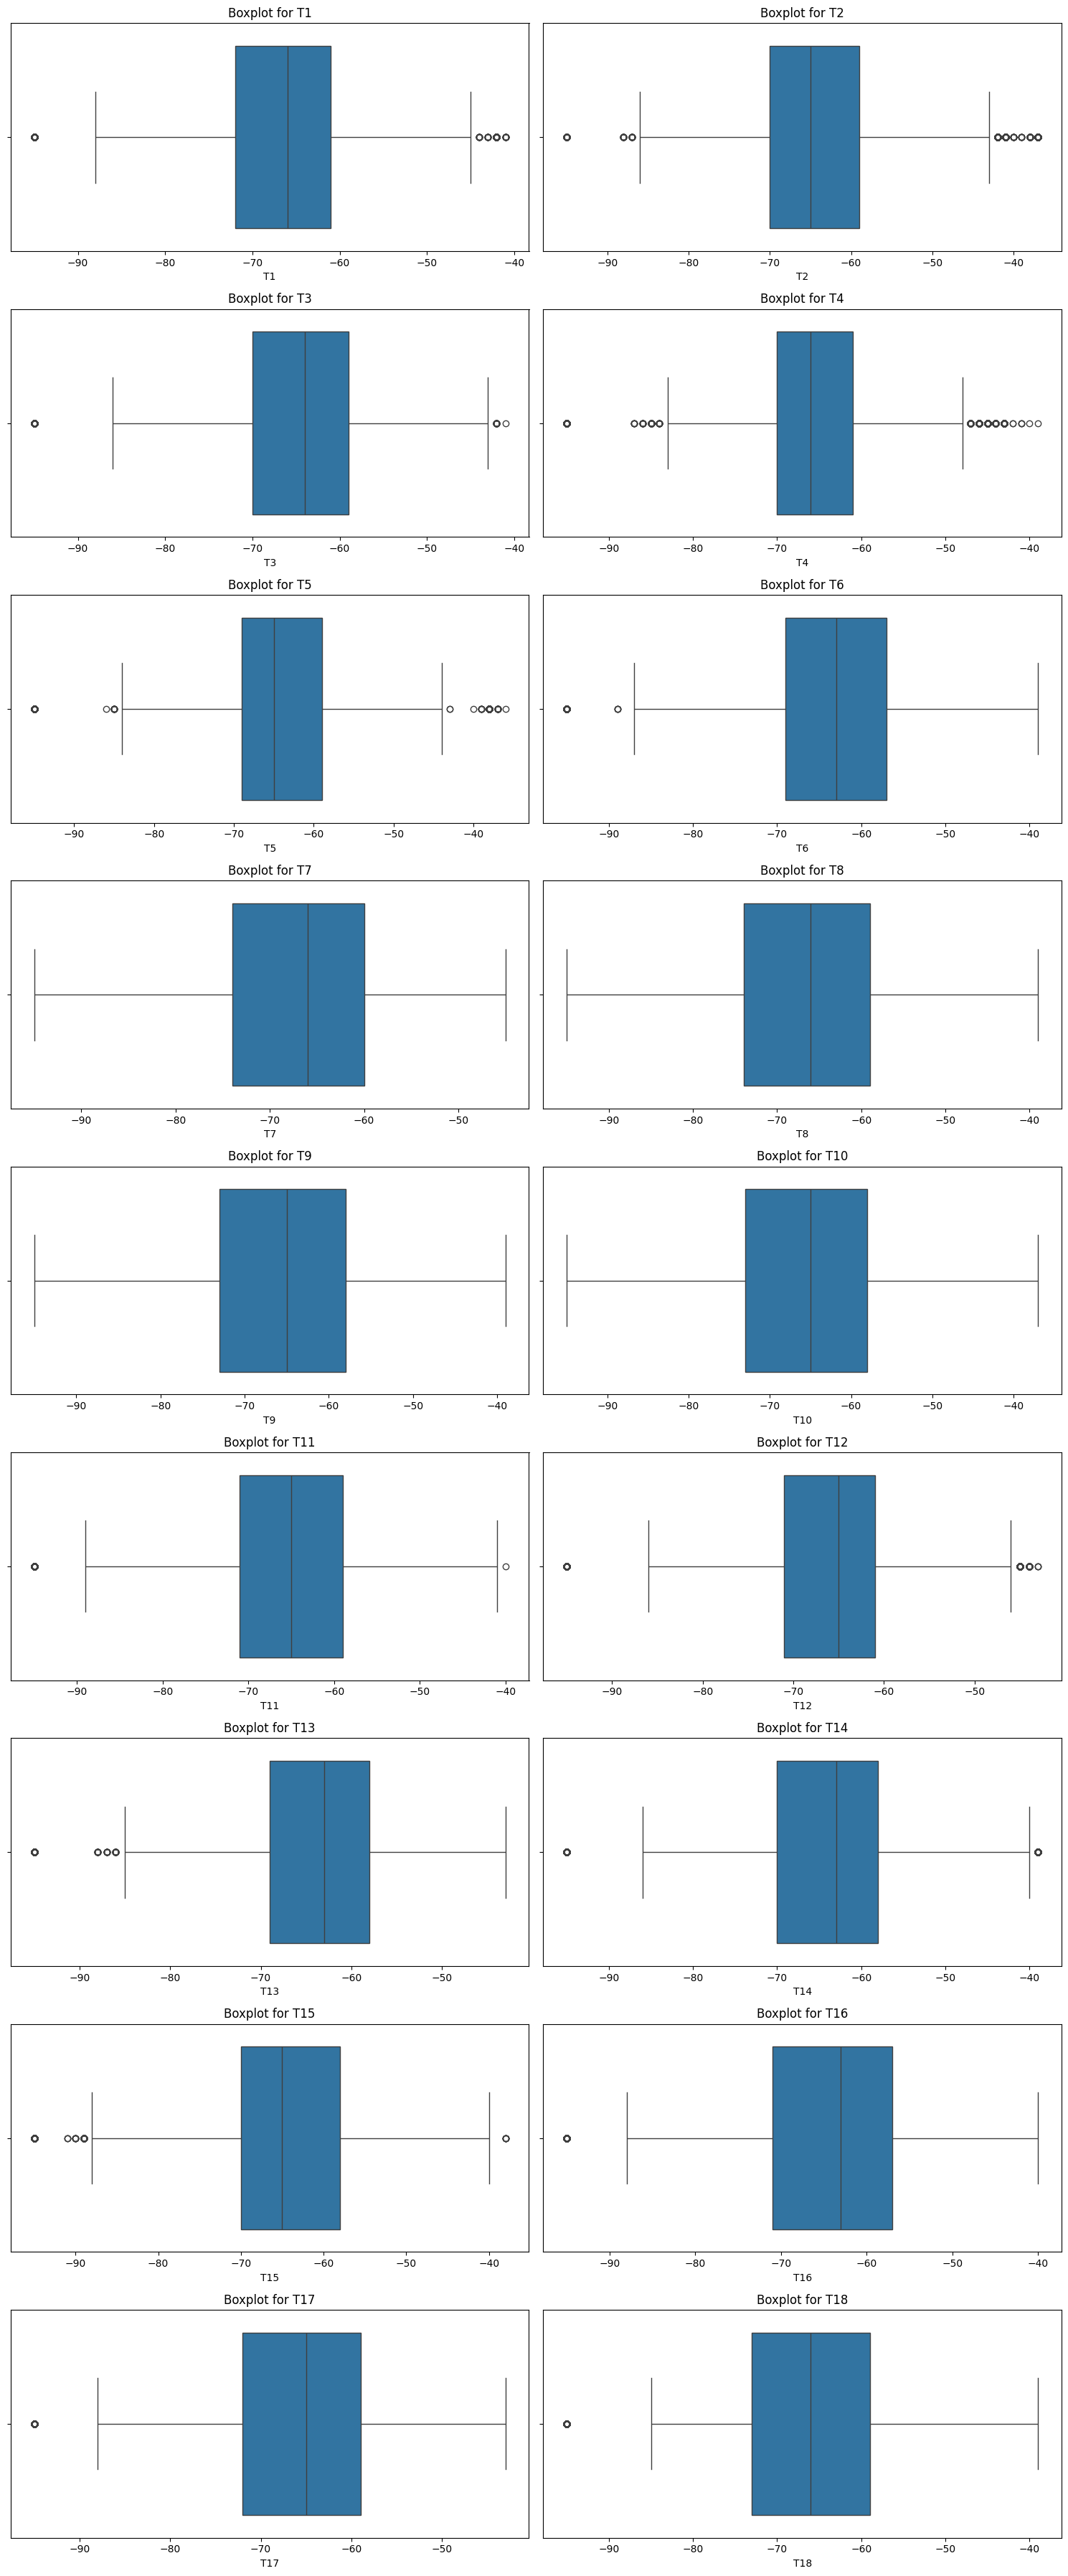

In [38]:
def plot_boxplots(data, columns, ncols=2):
    nrows = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

    for i, column in enumerate(columns):
        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i % ncols]

        if data[column].dtype == 'O':  # 'O' represents object (categorical) dtype
            sns.countplot(x=column, data=data, ax=ax)
            ax.set_title(f'Countplot for {column}')
        else:
            sns.boxplot(x=column, data=data, ax=ax)
            ax.set_title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()

plot_boxplots(train_data, continuous_vars)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🎇REMOVING THE OUTLIERS🎇</div>

In [39]:
def remove_outliers_replace(data, columns, threshold=1.5):
    data_no_outliers = data.copy()

    for column in columns:
        Q1 = data_no_outliers[column].quantile(0.25)
        Q3 = data_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        is_outlier = (data_no_outliers[column] < lower_bound) | (data_no_outliers[column] > upper_bound)

        if data_no_outliers[column].dtype == 'O':  # Categorical column
            median_value = data_no_outliers.loc[~is_outlier, column].mode().iloc[0]
            data_no_outliers.loc[is_outlier, column] = median_value
        else:  # Numerical column
            mean_value = data_no_outliers.loc[~is_outlier, column].mean()
            data_no_outliers.loc[is_outlier, column] = mean_value

    return data_no_outliers

train_data = remove_outliers_replace(train_data, continuous_vars)
test_data = remove_outliers_replace(test_data, continuous_vars)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">Dividing the independent and dependent columns seperately</div>

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to a single categorical column
train_data['target_encoded'] = label_encoder.fit_transform(train_data['target'])

In [41]:
X = train_data.drop(columns=['target_encoded','target'], axis=1)
y = train_data['target_encoded']

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
Y_scaled = scaler.fit_transform(test_data)

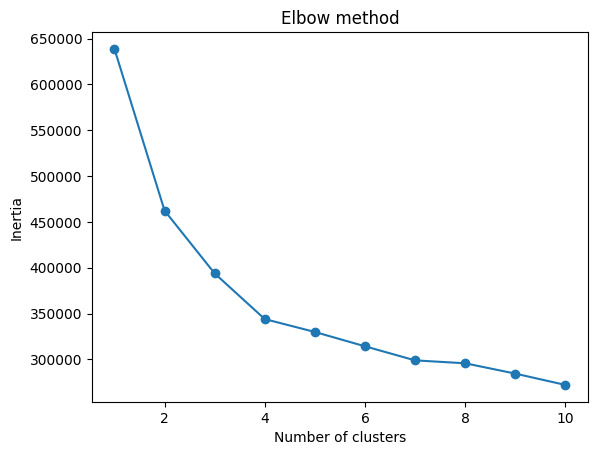

In [51]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [47]:
print("The elbow method shows that 4 is a good value for K, so we retrain and visualize the result: ")

Optimal number of clusters (Elbow Method): 1


In [52]:
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=2)

In [53]:
clusters = kmeans.predict(X_scaled)

In [54]:
train_data['Cluster'] = clusters

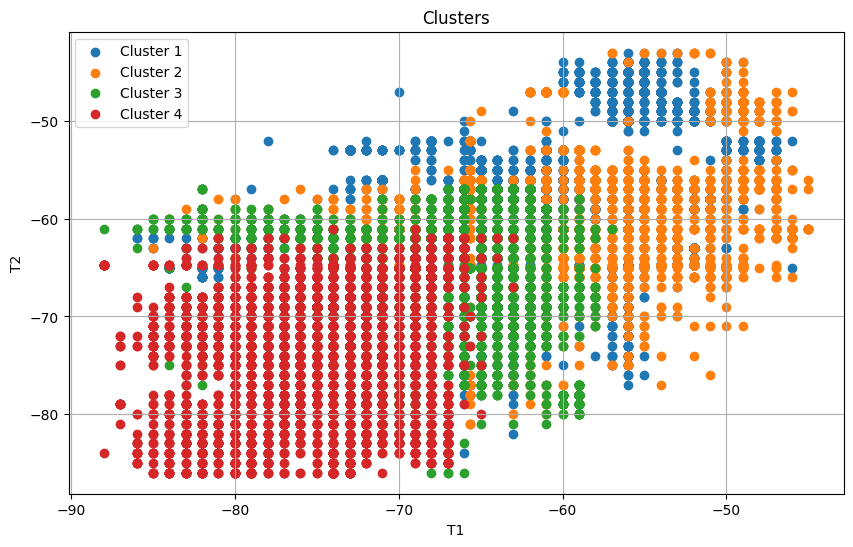

In [55]:
# Plot the clusters using the first two columns as features
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = train_data[train_data['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster + 1}')

plt.title('Clusters')
plt.xlabel(train_data.columns[0])  
plt.ylabel(train_data.columns[1])  
plt.legend()
plt.grid(True)
plt.show()

In [56]:
print("Cluster data columns are:",cluster_data.columns)

Cluster data columns are: Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'target',
       'target_encoded', 'Cluster'],
      dtype='object')


In [58]:
# Assign cluster labels to the original data
train_data['Cluster'] = kmeans.labels_

In [63]:
# Function to classify a new data point
def classify_new_point(new_point):
    new_point_scaled = scaler.transform([new_point])
    cluster = kmeans.predict(new_point_scaled)
    return cluster[0]

In [70]:
for i in range(10):
    test_vals = test_data.iloc[i].values
    cluster = classify_new_point(test_vals)
    print("The data points belongs to Cluster-",cluster)


The data points belongs to Cluster- 3
The data points belongs to Cluster- 1
The data points belongs to Cluster- 3
The data points belongs to Cluster- 0
The data points belongs to Cluster- 2
The data points belongs to Cluster- 0
The data points belongs to Cluster- 2
The data points belongs to Cluster- 0
The data points belongs to Cluster- 3
The data points belongs to Cluster- 1


In [ ]:
# Classification 

In [66]:
target_value_counts = train_data['target'].value_counts()
total_classes = len(target_value_counts)
print("Total number of different classes in target column:", total_classes)

Total number of different classes in target column: 160


In [71]:
train_data.head(5)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T12,T13,T14,T15,T16,T17,T18,target,target_encoded,Cluster
0,-70.0,-61.00000,-66.0,-53.0,-51.0,-63.0,-82.0,-57.0,-76.0,-78.0,...,-66.0,-61.0,-59.0,-73.0,-75.0,-63.000000,-77.0,B37,110,0
1,-77.0,-74.00000,-71.0,-76.0,-65.0,-63.0,-66.0,-52.0,-55.0,-75.0,...,-75.0,-74.0,-61.0,-64.0,-63.0,-53.000000,-63.0,B61,137,3
2,-53.0,-64.77058,-55.0,-66.0,-62.0,-62.0,-65.0,-70.0,-62.0,-52.0,...,-53.0,-66.0,-68.0,-72.0,-60.0,-68.000000,-77.0,A19,10,0
3,-72.0,-62.00000,-59.0,-65.0,-65.0,-65.0,-78.0,-82.0,-83.0,-59.0,...,-60.0,-64.0,-83.0,-69.0,-72.0,-65.259861,-73.0,A22,14,1
4,-67.0,-69.00000,-65.0,-63.0,-59.0,-53.0,-70.0,-72.0,-71.0,-60.0,...,-57.0,-54.0,-76.0,-61.0,-66.0,-71.000000,-80.0,A33,26,0


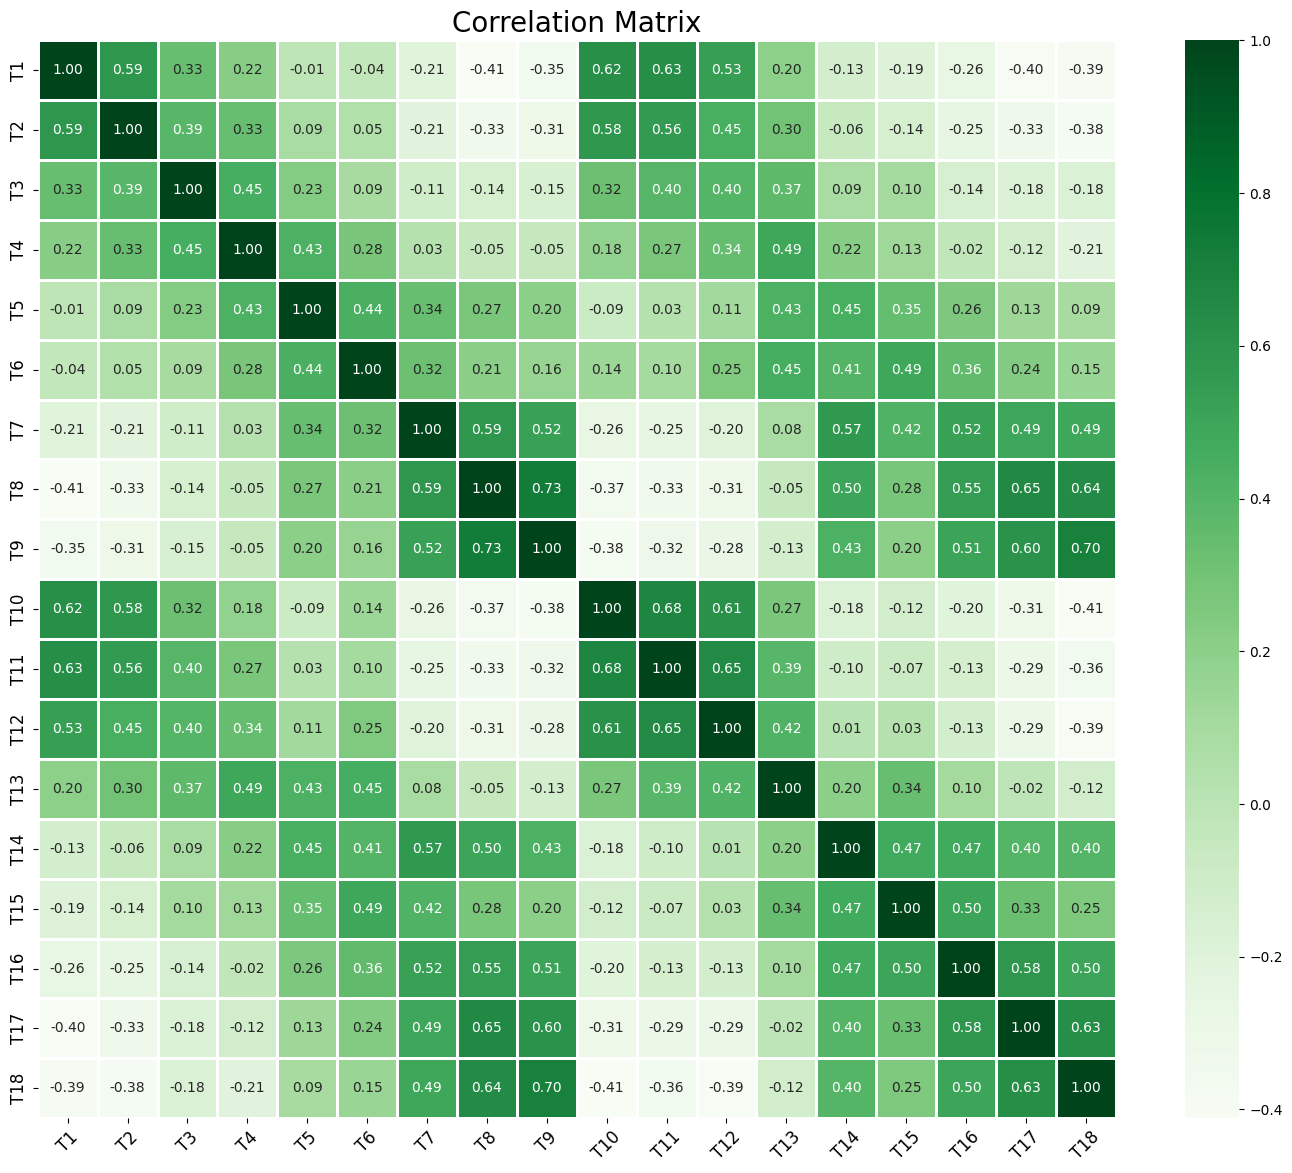

In [73]:
correlation_matrix = X.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(18, 14))  # Increase the width and height as needed

# Plot the correlation matrix as a heatmap with larger boxes
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=1, square=True)

# Customize plot
plt.title('Correlation Matrix', fontsize=20)  # Increase the font size of the title
plt.xticks(fontsize=12)  # Increase the font size of x-axis labels
plt.yticks(fontsize=12)  # Increase the font size of y-axis labels

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the aspect ratio to prevent distortion of cell shapes
heatmap.set_aspect('equal')

plt.show()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [75]:
Logistic_model = LogisticRegression(max_iter = 1000)

In [76]:
Logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

The `LogisticRegression` model with the `max_iter` parameter set to 1000 is commonly chosen for several reasons:

1. **Convergence**: Setting `max_iter` to a higher value ensures that the optimization algorithm has sufficient iterations to converge to a solution. Logistic regression uses iterative optimization techniques like gradient descent to find the optimal coefficients, and increasing `max_iter` helps ensure that the algorithm converges to a stable solution.

2. **Complexity of Data**: For complex datasets or datasets with a large number of features, more iterations may be needed for the optimization algorithm to converge. Setting `max_iter` to a higher value accommodates these scenarios.

3. **Preventing Early Stopping**: Early stopping occurs when the optimization algorithm terminates before convergence due to reaching the maximum number of iterations. By setting `max_iter` to a sufficiently high value, we can prevent premature termination and allow the algorithm to converge to a better solution.

4. **Trade-off with Computational Cost**: While increasing `max_iter` can improve the likelihood of convergence, it also increases the computational cost, particularly for large datasets or high-dimensional feature spaces. Therefore, the choice of `max_iter` involves a trade-off between computational resources and convergence reliability.

In [87]:
y_pred = Logistic_model.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", lr_acc*100,"%")

Accuracy of Logistic Regression: 97.40735522051571 %


In [81]:
svm_classifier = SVC(kernel='linear', random_state=6)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=6)

Support Vector Machines (SVMs) are chosen for classification tasks due to several reasons:

1. **Effective in high-dimensional spaces**: SVMs perform well in high-dimensional spaces, making them suitable for problems with many features, such as text classification or image recognition.

2. **Memory efficient**: SVMs use a subset of training points in the decision function (called support vectors), making them memory efficient, especially for large datasets.

3. **Versatile kernels**: SVMs can use different kernel functions to adapt to various types of data. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

4. **Regularization parameter**: SVMs have a regularization parameter (C), which helps prevent overfitting by balancing the trade-off between maximizing the margin and minimizing the classification error.

5. **Global optimal solution**: SVMs find the optimal separating hyperplane that maximizes the margin between classes, resulting in a global optimal solution.

6. **Effective in non-linear classification**: SVMs can handle non-linear decision boundaries by using kernel tricks to map the input space into a higher-dimensional feature space where a linear separation is possible.

7. **Robust to outliers**: SVMs are less sensitive to outliers compared to other classification algorithms like logistic regression.



In [88]:
y_pred_sv = svm_classifier.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_sv)
print("Accuracy of SVM:", svm_acc*100,"%")

Accuracy of SVM: 98.30914470903198 %


In [85]:
test_pred_sv = svm_classifier.predict(Y_scaled)

In [108]:
# Inverse transform the label encoded predictions
test_pred_inverse = label_encoder.inverse_transform(test_pred_sv)

# Create a DataFrame for the inverse transformed predictions
inverse_df = pd.DataFrame({'Original_Target': test_pred_inverse})

# Save the DataFrame to an Excel file
inverse_df.to_excel('SVM-1.xlsx', index=False)

print("Inverse transformed predictions saved to SVM.xlsx")

Exception ignored in: <function ZipFile.__del__ at 0x0000027E0D7162A0>
Traceback (most recent call last):
  File "C:\Python\Python311\Lib\zipfile.py", line 1874, in __del__
    self.close()
  File "C:\Python\Python311\Lib\zipfile.py", line 1891, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
Exception ignored in: <function ZipFile.__del__ at 0x0000027E0D7162A0>
Traceback (most recent call last):
  File "C:\Python\Python311\Lib\zipfile.py", line 1874, in __del__
    self.close()
  File "C:\Python\Python311\Lib\zipfile.py", line 1891, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


Inverse transformed predictions saved to SVM.xlsx


In [91]:
accuracy_scores = {
    'Model': ['Logistic Regression', 'Support Vector Machine'],
    'Accuracy': [lr_acc,svm_acc]  
}

accuracy_df = pd.DataFrame(accuracy_scores)
accuracy_df['Accuracy'] = accuracy_df['Accuracy'].astype(str) + '%'

In [92]:
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.9740735522051571%
1,Support Vector Machine,0.9830914470903198%


In [94]:
import joblib
best_model = svm_classifier
joblib.dump(best_model, 'svm_model.pkl')
print("Best model saved as svm_model.pkl")

Best model saved as svm_model.pkl


In [110]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [95]:
kmeans_model_filename = 'kmeans_model.pkl'

# Save the model to a file
joblib.dump(kmeans, kmeans_model_filename)

print("KMeans model saved as", kmeans_model_filename)

KMeans model saved as kmeans_model.pkl


In [96]:
scaler_model_filename = 'scaler_model.pkl'

# Save the StandardScaler object to a file
joblib.dump(scaler, scaler_model_filename)

print("StandardScaler model saved as", scaler_model_filename)

StandardScaler model saved as scaler_model.pkl


In [109]:
lr_model_filename = 'lr_model.pkl'

# Save the StandardScaler object to a file
joblib.dump(Logistic_model, lr_model_filename)

print("Logistic Regression model saved as", lr_model_filename)

Logistic Regression model saved as lr_model.pkl


In [99]:
# read the excel file
raw_data = pd.read_excel("rawdata.xlsx")

raw_data.columns = raw_data.columns.str.strip()

# Derive Datewise total duration for each inside and outside
raw_data['datetime'] = pd.to_datetime(raw_data['date'].astype(str) + ' ' + raw_data['time'].astype(str), errors='coerce')


In [100]:
# Handle potential errors in datetime parsing
raw_data = raw_data.dropna(subset=['datetime'])

In [101]:
# Sort by datetime to ensure correct calculation of durations
raw_data = raw_data.sort_values(by='datetime')

In [102]:
# Calculate the duration between consecutive activities
raw_data['duration'] = raw_data['datetime'].diff().dt.total_seconds()

In [103]:
# Fill the first NaN value in 'duration' with 0
raw_data['duration'] = raw_data['duration'].fillna(0)

In [104]:
# Calculate date-wise total duration for each inside and outside
duration_summary = raw_data.groupby(['date', 'position'])['duration'].sum().reset_index()


In [105]:
# Calculate date-wise number of picking and placing activities
activity_summary = raw_data.groupby(['date', 'activity']).size().reset_index(name='count')


In [ ]:
# Output the results
print("Duration Summary:")
print(duration_summary)

print("\nActivity Summary:")
print(activity_summary)


In [106]:

# Save the results to an Excel file
with pd.ExcelWriter('output.xlsx') as writer:
    duration_summary.to_excel(writer, sheet_name='Duration Summary', index=False)
    activity_summary.to_excel(writer, sheet_name='Activity Summary', index=False)